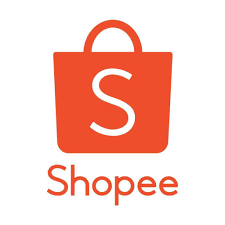</a>

<h1 align="center"><font size="5">Project: Comments analysis - Predict "sentiment" of comments from shopee clothes comments</font></h1>
<h2 align="center"><font size="5">Deadline: 2023-05-27 00:00:00 (Thursday)</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

### Ch√∫ √Ω: H·ªçc vi√™n t·∫°o folder tr√™n Google Drive theo c√∫ ph√°p: MDS5_HoVaTen_Thi, upload to√†n b·ªô b√†i thi l√™n >> Share folder n√†y cho th·∫ßy theo email: datafarmer2019@gmail.com ƒë·ªÉ th·∫ßy ch·∫•m ƒëi·ªÉm. Y√™u c·∫ßu: N·ªôp b√†i ƒë√∫ng deadline. B√†i l√†m gi·ªëng nhau b·ªã tr·ª´ ƒëi·ªÉm.

### Your information:
- Fullname: Cao Anh Hao
- Date of birth: 05/01/2002
- Place of birth: TPHCM
- Email:caoanhhao20@gmail
- Mobile phone: 0902536407

In this notebook, we practice all the knowledge and skills that we have learned in this course (MDS5: Data pre-processing and Analysis)

We apply the **Logistic Regression Algorithm** to predict: **"sentiment of comments from shopee clothes comments"** by accuracy evaluation methods.

<!-- Please read [Gemstone price prediction information](https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction) carefully before you do this project! -->

Dataset: comment_final.csv

#### Data dictionary:
1. raw_comment: comment of user
2. label: sactify of user

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Logistic Regression
    - Model Evaluation using Test set
    - Report

### Import library

In [5]:
import pandas as pd
import numpy as np
import regex
from underthesea import sent_tokenize
import string
from processor.text import TextProcessor
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import metrics

In [24]:
import warnings
warnings.filterwarnings('ignore')

### Read and overview dataset

In [25]:
df = pd.read_csv('./input_data/comment_final.csv')
df.head()

raw_comment  label
0                                     form k ƒë·∫πp l·∫Øm    0.0
1      √Åo R·ªông th·∫≠t s·ª±\nGl nhanh\nCh·∫≠t l∆∞·ª£ng v·∫£i t·ªët    1.0
2                    M√†u t√∫i h∆°i t·ªëi do v·ªõi ·∫£nh ch·ª•p    0.0
3                             Ch·∫•t li·ªáu v·∫£i k ·ªïn l·∫Øm    0.0
4  M√£ "m√†u ƒëen" hi·ªán l√™n √°o m√†u ƒëen, c√≤n m√£ "ƒëeN"...    0.0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11364 entries, 0 to 11363
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   raw_comment  11364 non-null  object 
 1   label        11364 non-null  float64
dtypes: float64(1), object(1)
memory usage: 177.7+ KB


### Pre-processing data

#### Convert to lower case

In [27]:
df['comments'] =  df.raw_comment.str.lower()
df.head()

raw_comment  label  \
0                                     form k ƒë·∫πp l·∫Øm    0.0   
1      √Åo R·ªông th·∫≠t s·ª±\nGl nhanh\nCh·∫≠t l∆∞·ª£ng v·∫£i t·ªët    1.0   
2                    M√†u t√∫i h∆°i t·ªëi do v·ªõi ·∫£nh ch·ª•p    0.0   
3                             Ch·∫•t li·ªáu v·∫£i k ·ªïn l·∫Øm    0.0   
4  M√£ "m√†u ƒëen" hi·ªán l√™n √°o m√†u ƒëen, c√≤n m√£ "ƒëeN"...    0.0   

                                            comments  
0                                     form k ƒë·∫πp l·∫Øm  
1      √°o r·ªông th·∫≠t s·ª±\ngl nhanh\nch·∫≠t l∆∞·ª£ng v·∫£i t·ªët  
2                    m√†u t√∫i h∆°i t·ªëi do v·ªõi ·∫£nh ch·ª•p  
3                             ch·∫•t li·ªáu v·∫£i k ·ªïn l·∫Øm  
4  m√£ "m√†u ƒëen" hi·ªán l√™n √°o m√†u ƒëen, c√≤n m√£ "ƒëen"...

#### Check duplicate and remove

In [28]:
df.comments.duplicated().sum()

0

###### no data duplicated

In [29]:
df.drop_duplicates(subset=['comments'], inplace=True)

#### Check missing values

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11364 entries, 0 to 11363
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   raw_comment  11364 non-null  object 
 1   label        11364 non-null  float64
 2   comments     11364 non-null  object 
dtypes: float64(1), object(2)
memory usage: 355.1+ KB


###### no missing value

#### Remove `‚Äô` 

In [31]:
df.comments = df.comments.str.replace('‚Äô', '')

#### Convert multiple dot to 1 dot

In [42]:
df.comments = df.comments.apply(lambda x: regex.sub(r'\.+', '.', x))

#### Process teencode

In [44]:
text_processor = TextProcessor()

In [45]:
df.comments = df.comments.apply(lambda x: text_processor.replace_teencode_to_text(x)


#### Process special word

In [46]:
df.comments = df.comments.apply(lambda x: text_processor.process_special_word(x))


#### Cleaning data

In [48]:
df.comments = df.comments.apply(lambda x: text_processor.process_text(str(x)))

#### Convert to unicode

In [49]:
df.comments = df.comments.apply(lambda x: text_processor.covert_unicode(x))

#### Process post_tagging

In [50]:
df.comments = df.comments.apply(lambda x: text_processor.process_postag_thesea(x))

In [51]:
df.head()

raw_comment  label  \
0                                     form k ƒë·∫πp l·∫Øm    0.0   
1      √Åo R·ªông th·∫≠t s·ª±\nGl nhanh\nCh·∫≠t l∆∞·ª£ng v·∫£i t·ªët    1.0   
2                    M√†u t√∫i h∆°i t·ªëi do v·ªõi ·∫£nh ch·ª•p    0.0   
3                             Ch·∫•t li·ªáu v·∫£i k ·ªïn l·∫Øm    0.0   
4  M√£ "m√†u ƒëen" hi·ªán l√™n √°o m√†u ƒëen, c√≤n m√£ "ƒëeN"...    0.0   

                                            comments  
0                                      kh√¥ng_ƒë·∫πp l·∫Øm  
1                             r·ªông gl nhanh ch·∫≠t t·ªët  
2                                       h∆°i t·ªëi ch·ª•p  
3                                       kh√¥ng_·ªïn l·∫Øm  
4  ƒëen hi·ªán l√™n ƒëen m√£ ƒëen hi·ªán l√™n ƒë·∫∑t ƒëen shop ...

### Visualize

In [52]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(background_color='black')

In [53]:
df_1 = df[df.label == 1]
df_1.head()

raw_comment  label  \
1      √Åo R·ªông th·∫≠t s·ª±\nGl nhanh\nCh·∫≠t l∆∞·ª£ng v·∫£i t·ªët    1.0   
5  S·∫£n ph·∫©m ƒë·∫πp gi·ªëng h√¨nh ph√π h·ª£p gi√° ti·ªÅn ƒë√≥ng ...    1.0   
6  S·∫£n ph·∫©m gi·ªëng h√¨nh , shop giao h√†ng nhanh , ƒë...    1.0   
8  Sp ƒë√∫ng m√¥ t·∫£ ,v·∫£i ko d√†y nh∆∞ng ko m·ªèng ,m·∫∑c k...    1.0   
9                  Ch·∫≥ng bi·∫øt n√≥i g√¨ th√™m, tuy·ªát v·ªùi    1.0   

                                            comments  
1                             r·ªông gl nhanh ch·∫≠t t·ªët  
5                  ƒë·∫πp gi·ªëng ƒë√≥ng_g√≥i ƒë·∫πp giao nhanh  
6                         gi·ªëng giao nhanh ƒë√≥ng ch·∫Øn  
8  ƒë√∫ng kh√¥ng_d√†y m·∫∑c kh√° m√°t th√≠ch_h·ª£p tr·∫ª m·∫∑c ƒë...  
9                                ch·∫≥ng bi·∫øt n√≥i th√™m

In [58]:
label_1 =' '.join(df_1['comments'])
label_1

"r·ªông gl nhanh ch·∫≠t t·ªët ƒë·∫πp gi·ªëng ƒë√≥ng_g√≥i ƒë·∫πp giao nhanh gi·ªëng giao nhanh ƒë√≥ng ch·∫Øn ƒë√∫ng kh√¥ng_d√†y m·∫∑c kh√° m√°t th√≠ch_h·ª£p tr·∫ª m·∫∑c ƒë·∫πp lu√¥n ch·∫≥ng bi·∫øt n√≥i th√™m may may xong c≈©ng kh√¥ng_l√† sƒÉn kh√¥ng_√Ω ki·∫øn nhi·ªÅu mua cute mua xong l√† ghi·ªÅn lu√¥n x·ªâu cute ti·∫øc ch·ªâ ƒë·∫∑t üòÖ nh·ªè v·ª´a_t·∫ßm m√°t l·∫Øm ƒë·∫πp qu√° kh√¥ng_l·ª° r·∫•t ƒë√°ng xinh g√≥i giao kh√° nhanh g√≥i x·ªãn nhi·ªÅu th·∫ª ngƒÉn r·ªông c·ª±c th√≠ch h√¨nh_·∫£nh kh√¥ng_li√™n ch∆∞a m·∫∑c ch∆∞a ƒëem ra m·ªèng t·ªët ƒë√∫ng ƒë√∫ng mua t∆∞_v·∫•n r·∫•t nhi·ªát_t√¨nh_shop r·∫•t co h∆°i r·ªông so s·∫£n_ph·∫©m giao s·∫£n_ph·∫©m t·ªët kh√° ∆∞ng tr·∫Øng b·ªã v·ªát b·∫©n thui l√† n√™n mua ƒë∆∞·ª£c ∆∞ng l·∫Øm mua ƒë∆∞·ª£c sale s·∫£n_ph·∫©m t·ªët giao gi·ªëng oks·∫£n_ph·∫©m so ƒë·∫πp ƒë√∫ng ƒë√∫ng shipper l·∫°i kh√¥ng_cho ki·ªÉm_tra l√†m giao sai kh√¥ng_ƒë√∫ng c√≤n l·∫°i yhi ƒë·ªÅu r·∫•t okila ƒë·∫πp t·ªët giao nhanh ph·ª•c_v·ª• t·ªët r·∫•t ∆∞ng_√Ω s·∫Ω ·ªßng_h·ªô r·∫•t ƒë

In [59]:
wc.generate(label_1)

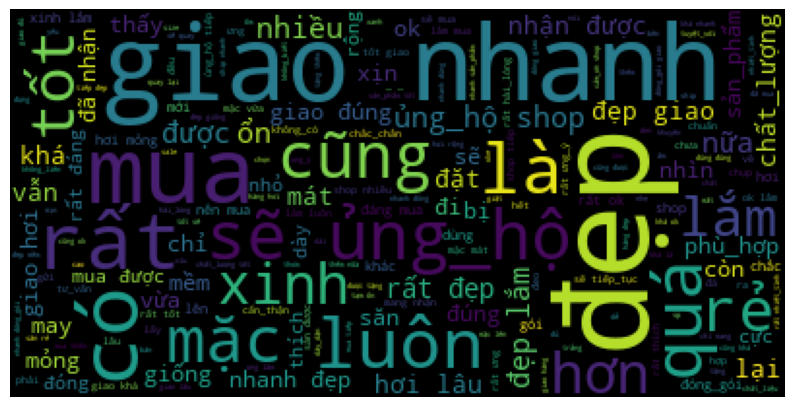

In [65]:
plt.figure(figsize=(10, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [67]:
df_2 = df[df.label == 0]
label_2 =' '.join(df_2['comments'])
wc.generate(label_2)

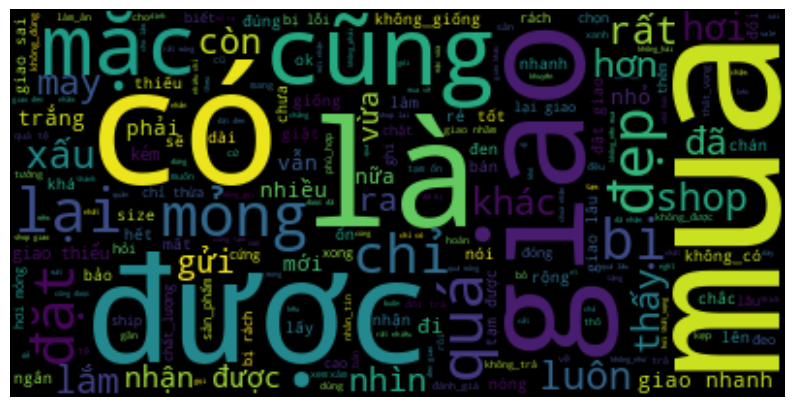

In [68]:
plt.figure(figsize=(10, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Build Model

#### Split into input/output

In [69]:
y = df['label']
X = df['comments']

In [70]:
X.head()

0                                        kh√¥ng_ƒë·∫πp l·∫Øm
1                               r·ªông gl nhanh ch·∫≠t t·ªët
2                                         h∆°i t·ªëi ch·ª•p
3                                         kh√¥ng_·ªïn l·∫Øm
4    ƒëen hi·ªán l√™n ƒëen m√£ ƒëen hi·ªán l√™n ƒë·∫∑t ƒëen shop ...
Name: comments, dtype: object

In [71]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

#### Split into train/test 

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

837                                            nh·ªè ko mua
1477    kh·ªèi c·∫ßn ph√¢n_v√¢n c·ª© mua lu√¥n ƒëj ƒë·∫≥ng_c·∫•p tr·ª• ...
1745                                          nh·∫°t h∆°n so
3657                                               ·ªïn ƒë·∫πp
6720                                        ok h∆°i to qu√°
Name: comments, dtype: object

#### Init pipeline for transform and training

In [78]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [79]:
Input = [('Vertorizer',TfidfVectorizer()),('model',LogisticRegression())]

In [80]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('Vertorizer', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [81]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Vertorizer', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [82]:
train_accuracy = pipe.score(X_train, y_train)
train_accuracy

0.8837263874222692

In [83]:
test_accuracy = pipe.score(X_test, y_test)
test_accuracy

0.8585005279831045

In [84]:
y_pred = pipe.predict(X_test)

### Evaluate result

In [90]:
confusion_matrix(y_test,y_pred)

array([[1255,  158],
       [ 244, 1184]], dtype=int64)

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1413
         1.0       0.88      0.83      0.85      1428

    accuracy                           0.86      2841
   macro avg       0.86      0.86      0.86      2841
weighted avg       0.86      0.86      0.86      2841



### Nh·∫≠n x√©t:
* V·ªõi t·ªâ l·ªá chia t·∫≠p train 25% (= 2841 user rating, trong ƒë√≥ 1255 gi√° tr·ªã 0-negative v√† 1586 gi√° tr·ªã 1-postive), model d·ª± ƒëo√°n:
 S·ªë l∆∞·ª£ng m·∫´u th·ª±c t·∫ø thu·ªôc nh√£n 0 v√† m√¥ h√¨nh d·ª± ƒëo√°n ƒë√∫ng l√† 1255.
S·ªë l∆∞·ª£ng m·∫´u th·ª±c t·∫ø thu·ªôc nh√£n 0 v√† m√¥ h√¨nh d·ª± ƒëo√°n sai l√† 158.
S·ªë l∆∞·ª£ng m·∫´u th·ª±c t·∫ø thu·ªôc nh√£n 1 v√† m√¥ h√¨nh d·ª± ƒëo√°n ƒë√∫ng l√† 1184.
S·ªë l∆∞·ª£ng m·∫´u th·ª±c t·∫ø thu·ªôc nh√£n 1 v√† m√¥ h√¨nh d·ª± ƒëo√°n sai l√† 244.
Classification Report:

Accuracy (ƒë·ªô ch√≠nh x√°c) c·ªßa m√¥ h√¨nh tr√™n t·∫≠p ki·ªÉm tra l√† 86%.
Precision (ƒë·ªô ch√≠nh x√°c d·ª± ƒëo√°n) c·ªßa nh√£n 0 l√† 84% v√† c·ªßa nh√£n 1 l√† 88%.
Recall (t·ª∑ l·ªá d·ª± ƒëo√°n ƒë√∫ng) c·ªßa nh√£n 0 l√† 89% v√† c·ªßa nh√£n 1 l√† 83%.
F1-score (trung b√¨nh ƒëi·ªÅu h√≤a gi·ªØa precision v√† recall) c·ªßa nh√£n 0 l√† 0.86 v√† c·ªßa nh√£n 1 l√† 0.85.
T·ªïng quan, m√¥ h√¨nh c√≥ ƒë·ªô ch√≠nh x√°c kh√° cao v√† c√≥ kh·∫£ nƒÉng ph√¢n lo·∫°i t·ªët nh·ªØng m·∫´u thu·ªôc c·∫£ nh√£n 0 v√† nh√£n 1.

In [92]:
accuracy_score(y_test,y_pred)

0.8585005279831045

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

In [94]:
y_pred_prob = pipe.predict_proba(X_test)
y_pred_prob[:5]

array([[0.71119796, 0.28880204],
       [0.98089955, 0.01910045],
       [0.00608666, 0.99391334],
       [0.89777981, 0.10222019],
       [0.0465521 , 0.9534479 ]])

In [95]:
roc_auc_score = y_test,y_pred_prob[:,1]

In [96]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

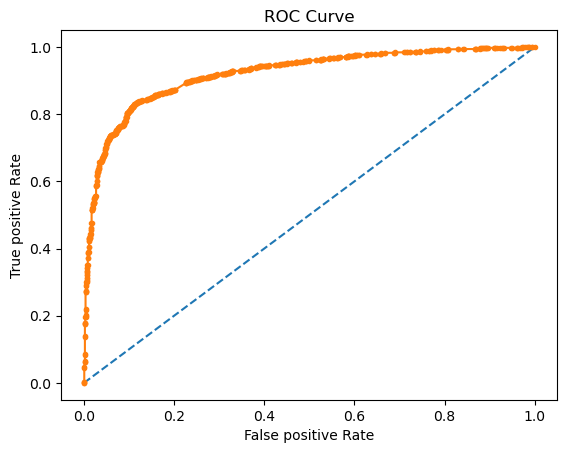

In [97]:
plt.title('ROC Curve')
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.show()

###
M√¥ h√¨nh ƒë·∫°t ƒë∆∞·ª£c hi·ªáu su·∫•t ƒë√°nh gi√° ·ªü m·ª©c "High" v·ªõi kh·∫£ nƒÉng:

ƒê·∫°t ƒë∆∞·ª£c t·ª∑ l·ªá Recall cao, t·ª©c l√† kh·∫£ nƒÉng d·ª± ƒëo√°n ƒë√∫ng c√°c m·∫´u thu·ªôc nh√£n d∆∞∆°ng/nh√£n 1 l√† r·∫•t cao.
ƒê·ªìng th·ªùi, v·∫´n gi·ªØ ƒë∆∞·ª£c ƒë·ªô ch√≠nh x√°c d·ª± ƒëo√°n (Precision) cao, t·ª©c l√† t·ª∑ l·ªá d·ª± ƒëo√°n ƒë√∫ng c√°c m·∫´u d∆∞∆°ng/nh√£n 1 l√† r·∫•t cao.
K·∫øt qu·∫£ n√†y cho th·∫•y m√¥ h√¨nh c√≥ kh·∫£ nƒÉng ph√¢n lo·∫°i t·ªët c·∫£ c√°c m·∫´u thu·ªôc nh√£n 0 v√† nh√£n 1, v√† ƒë·∫£m b·∫£o r·∫±ng s·ªë l∆∞·ª£ng d·ª± ƒëo√°n ƒë√∫ng v√† s·ªë l∆∞·ª£ng d·ª± ƒëo√°n sai ƒë·ªÅu ƒë∆∞·ª£c ki·ªÉm so√°t ·ªü m·ª©c ƒë√°ng tin c·∫≠y.